In [ ]:
import opendatasets as od


In [ ]:
dataset = 'https://www.kaggle.com/datasets/mirichoi0218/insurance'


In [ ]:
od.download(dataset)


In [ ]:
import os


In [ ]:
data_dir = '.\insurance'


In [ ]:
os.listdir(data_dir)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv('insurance.csv')


In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


sex     smoker
female  no       0.83
        yes      0.17
male    no       0.76
        yes      0.24
Name: smoker, dtype: float64


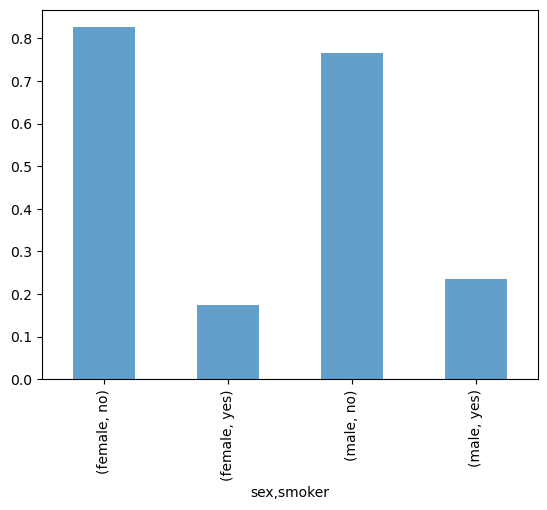

In [3]:
print(df.groupby('sex').smoker.value_counts(normalize=True))
df.groupby('sex').smoker.value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.show()

In [146]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.00,0,yes,southwest,16884.92
1,18,male,33.00,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.00,0,no,northwest,21984.47
4,32,male,28.00,0,no,northwest,3866.86


In [149]:
df.groupby('smoker').charges.mean()

smoker
no     8434.27
yes   32050.23
Name: charges, dtype: float64

In [150]:
df.groupby('region').charges.mean()

region
northeast   13406.38
northwest   12417.58
southeast   14735.41
southwest   12346.94
Name: charges, dtype: float64

In [156]:
df.groupby('region').smoker.value_counts(normalize=True)


region     smoker
northeast  no       0.79
           yes      0.21
northwest  no       0.82
           yes      0.18
southeast  no       0.75
           yes      0.25
southwest  no       0.82
           yes      0.18
Name: smoker, dtype: float64

In [157]:
df.groupby('sex').bmi.mean()

sex
female   29.88
male     30.45
Name: bmi, dtype: float64

In [159]:
df.groupby('smoker').bmi.mean()

smoker
no    30.16
yes   30.19
Name: bmi, dtype: float64

In [160]:
df.groupby('region').bmi.mean()

region
northeast   28.67
northwest   28.67
southeast   32.88
southwest   30.12
Name: bmi, dtype: float64

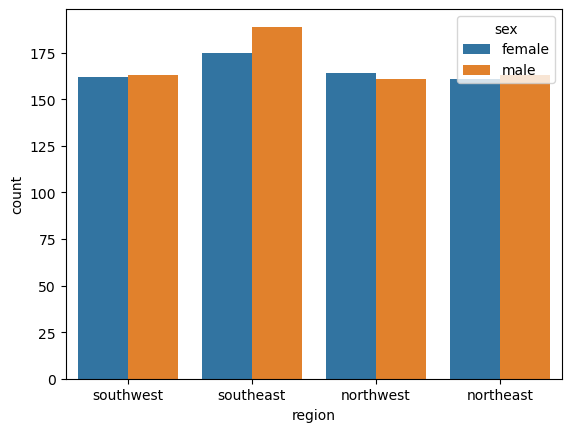

In [5]:
sns.countplot(x='region', hue='sex', data=df)
plt.show()

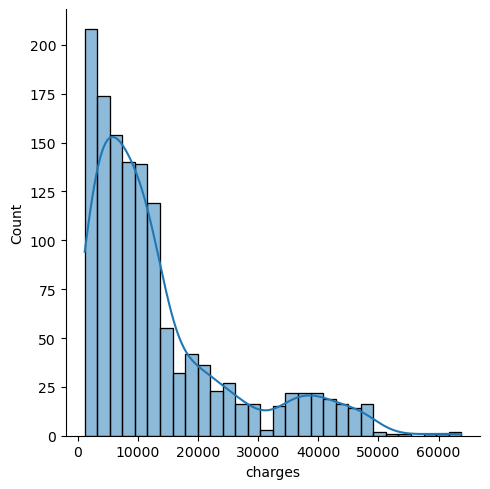

In [177]:
sns.displot(x='charges', data=df, kde=True);

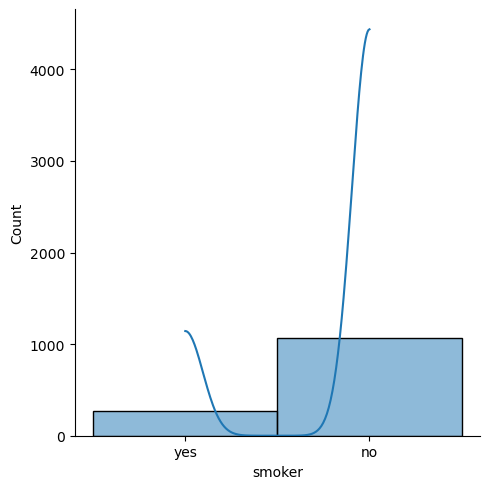

In [180]:
sns.displot(x='smoker', data=df, kde=True)

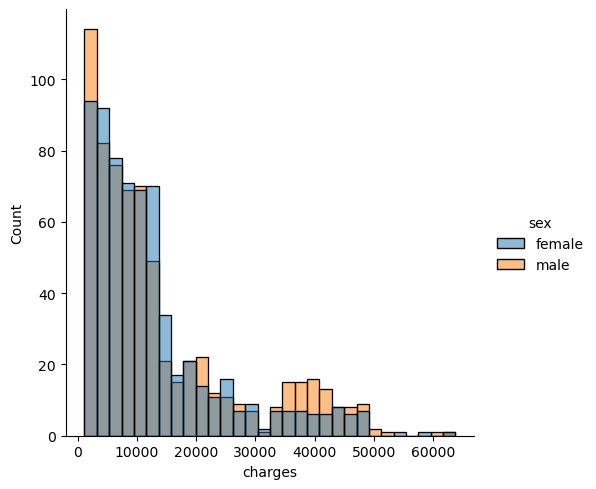

In [181]:
sns.displot(x='charges', data=df, hue='sex')

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: smoker, dtype: int64


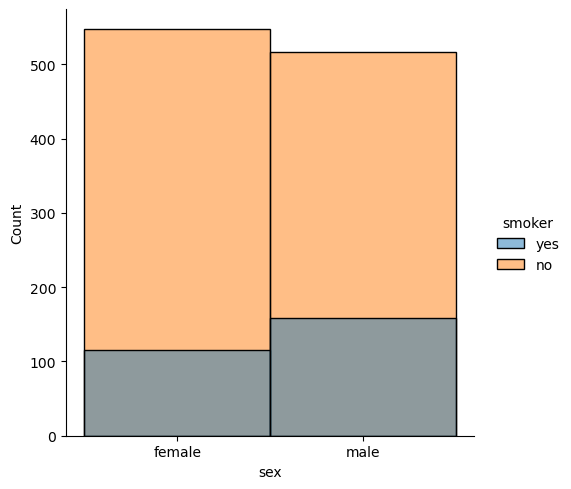

In [61]:
print(df.groupby('sex')['smoker'].value_counts())

sns.displot(x='sex', hue='smoker',  data=df)
plt.show()

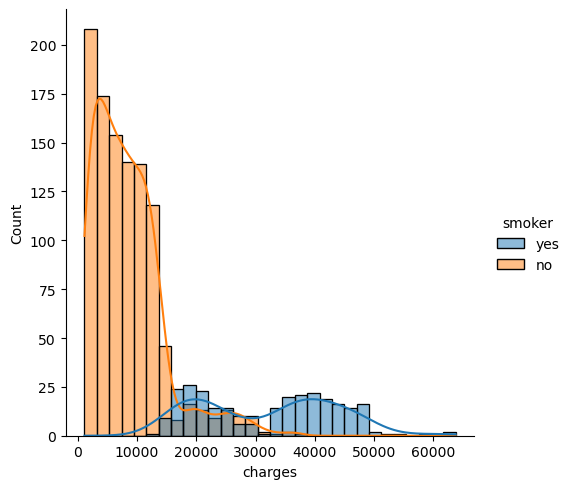

In [183]:
sns.displot(x='charges', hue='smoker', data=df, kde=True)

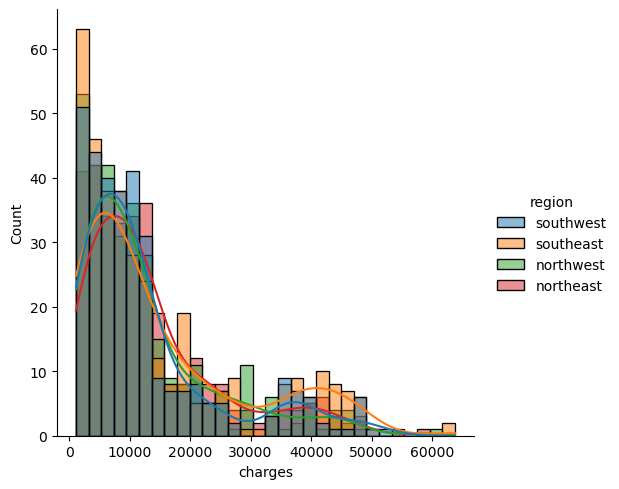

In [184]:
sns.displot(x='charges', hue='region', data=df, kde=True)

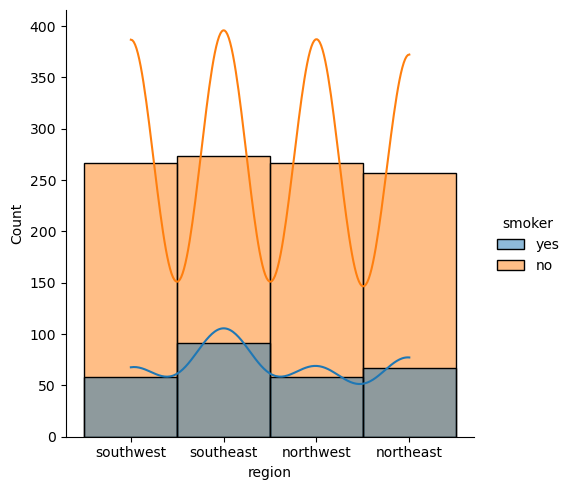

In [185]:
sns.displot(x='region', hue='smoker', data=df, kde=True)

<AxesSubplot:xlabel='region'>

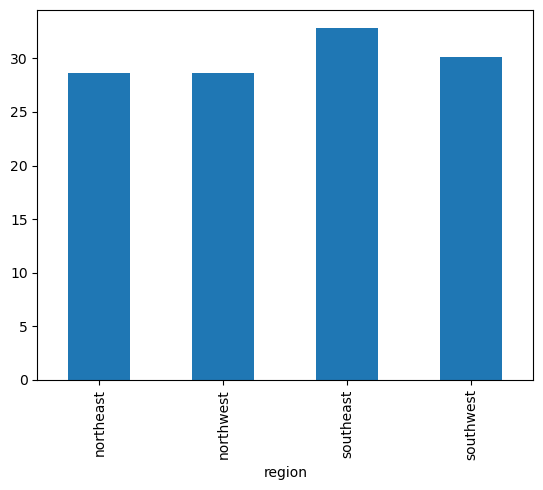

In [200]:
df.groupby('region').bmi.mean().plot(kind='bar')


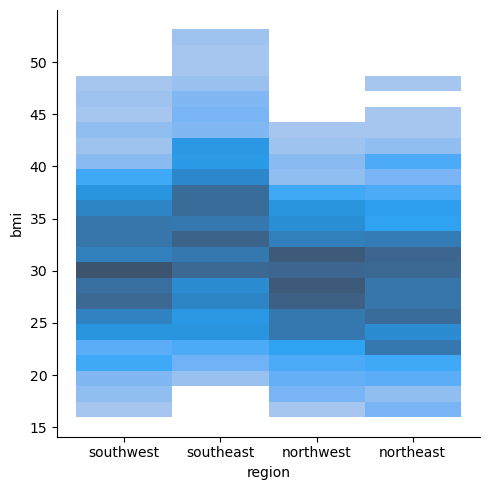

In [31]:
sns.displot(x='region', y='bmi', data=df, )
plt.show()

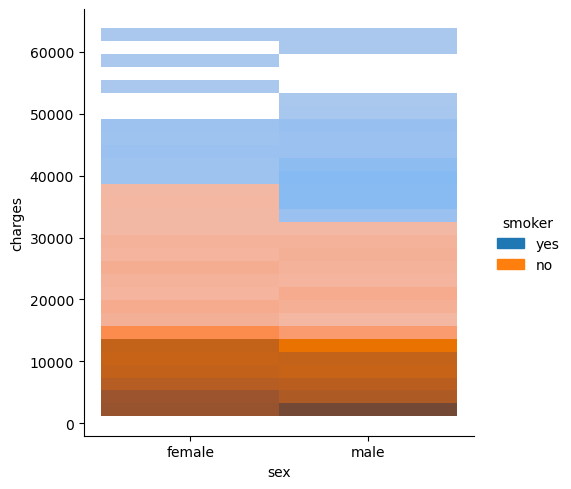

In [27]:
sns.displot(x='sex', y='charges', data=df, hue='smoker')
plt.show()

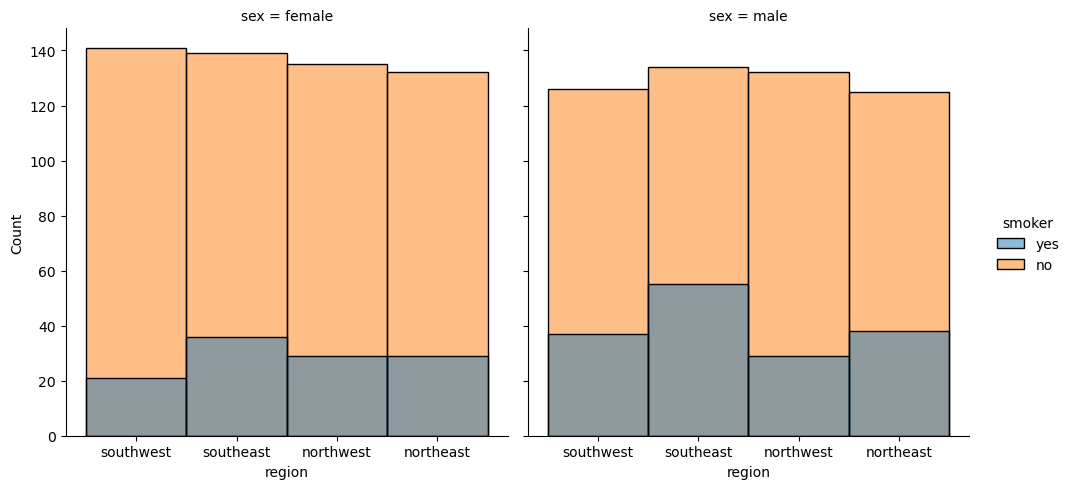

In [207]:
sns.displot(x='region', data=df, hue='smoker', col='sex')

In [220]:
# for x in df['charges']:
#     if x >= 0 and x <= 15000:
#         level_1 = x
        
#     elif x >= 15001 or x <= 30000:
#         level_2 = x
          
#     elif x >= 30001 or x <= 45000:
#         level_3 = x
          
#     else: 
#         level_4 = x
         

In [159]:
# df[df.sex == 'female'].groupby(["smoker"], sort=True)["charges"].max()
# df1 = df[df.sex =='female'].groupby(['smoker'], sort=True)['age']
# df1.plot(kind='bar', figsize=(10,5), alpha=0.7)
# plt.xticks(rotation=90)
# plt.show()

In [32]:
df.age.min()

18

**Segment ages in 3 groups (young, middle, old)**

In [ ]:
# age_young = df[(df['age'] >= 18) & (df['age'] <= 35)]
# age_young.describe()

In [152]:
# age_middle = df[(df['age'] > 35) & (df['age'] <= 50)]
# age_middle.describe()

In [153]:
# age_old = df[(df['age'] > 50)]
# age_old.describe()

**Segment charges in 4 groups. 1 is up to 16k. 2 up to 32.5k. 3 up to 48.5k. 4 is over 48.5k**

In [154]:
# charges_1 = df[(df['charges'] < 16000 )]
# charges_1.describe()

In [155]:
# charges_2 = df[(df['charges'] > 16000) & (df['charges'] <= 32500)]
# charges_2.describe()

In [156]:
# charges_3 = df[(df['charges'] > 32500) & (df['charges'] <= 48500)]
# charges_3.describe()

In [157]:
# charges_4 = df[(df['charges'] > 48500)]
# charges_4.min()

**Segmented age and charges. Next segment bmi. Then visualize different age groups/charges/bmi.
Then start building predictive models**

**Under weight = < 18.5  
Normal weight = 18.5 - 24.9  
Overweight = 25 - 29.9  
Obese = 30 +**  

In [158]:
# under_weight = df[(df['bmi'] < 18.5)]
# normal_weight = df[(df['bmi'] >= 18.5) & (df['bmi'] <= 24.9)]
# over_weight = df[(df['bmi'] >= 25) & (df['bmi'] <= 29.9)]
# obese = df[(df['bmi'] > 30)]

**Creating categorical variable to visualize**

In [161]:
df['age_cat'] = pd.cut(df['age'],
                      bins=[18, 35, 50, float('Inf')],
                      labels=['Young', 'Middle', 'Old'])

In [162]:
df.age_cat.value_counts()

Young     505
Middle    408
Old       356
Name: age_cat, dtype: int64

In [163]:
df['weight_cat'] = pd.cut(df['bmi'],
                         bins=[18, 25, 29, 30, float('Inf')],
                         labels=['Underweight', 'Normalweight', 'Overweight', 'Obese'])

In [165]:
df.weight_cat.value_counts()

Obese           705
Normalweight    313
Underweight     232
Overweight       73
Name: weight_cat, dtype: int64

In [169]:
# Segment charges in 4 groups. 1 is up to 16k. 2 up to 32.5k. 3 up to 48.5k. 4 is over 48.5k
df['charge_cat'] = pd.cut(df['charges'],
                         bins=[0, 16000, 32500, 48500, 64000],
                         labels=['cat_1', 'cat_2', 'cat_3', 'cat_4'])

In [177]:
df.charge_cat.value_counts()

cat_1    992
cat_2    192
cat_3    139
cat_4     15
Name: charge_cat, dtype: int64

In [ ]:
# disagmot_ct = df.charge_cat.value_counts(normalize=True)
# disagmot_ct = disagmot_ct[:3,]
# plt.figure.figsize=(10,5)
# sns.barplot(disagmot_ct.index, disagmot_ct.values, alpha=0.8)
# plt.show()
# charge_ct = df.charge_cat.value_counts(normalize=True)
# # charge_ct = charge_ct[:4,]
# plt.figure.figsize=(10,5)
# sns.countplot(x=charge_ct,  hue=['region'], alpha=.7)
# plt.show()

In [ ]:
# Value Counts New Columns